<a href="https://colab.research.google.com/github/samarth-mistry/phishing-site-detection/blob/main/phishingWebsiteDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**APPROCH:**

*The key idea is using Support vector machine (SVM) we can design a model that will first get hyperplane for SVM from training dataset and the for confirming it's working we will test it using testing data which is 20% of given dataset.*

**TOOLS AND TECHNIQUES**

*I have used google colab platform for designing this model.
Furthermore, some required libraries like Pandas, Matplot, Numpy are used.
Finally as we aim at classifying weather the site is phishing or legitimate, we have use SVM approach,
If the site is phishing the Result variable will be 1 else 0 for legitimate.*

1. **Importing packages**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. **Uploading** CSV from local disk [PhishingData csv is availible on my 
github]

In [3]:
import io
from google.colab import files
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['PhishingData.csv']))
data.head()

Saving PhishingData.csv to PhishingData (1).csv


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


3. **Information** about data

In [4]:
data.info

<bound method DataFrame.info of       having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                     1           1                   0                 0   
1                     0           1                   0                 0   
2                     0           0                   0                 0   
3                     0           0                   0                 0   
4                     0           0                   1                 0   
...                 ...         ...                 ...               ...   
2451                  0          -1                   0                 0   
2452                  0          -1                   0                 1   
2453                  0          -1                   0                 0   
2454                  0          -1                   0                 0   
2455                  0          -1                   0                 0   

      double_slash_redirecting  Prefix_Suff

In [9]:
#check column names
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

**4. Plotting graph of each feature column**

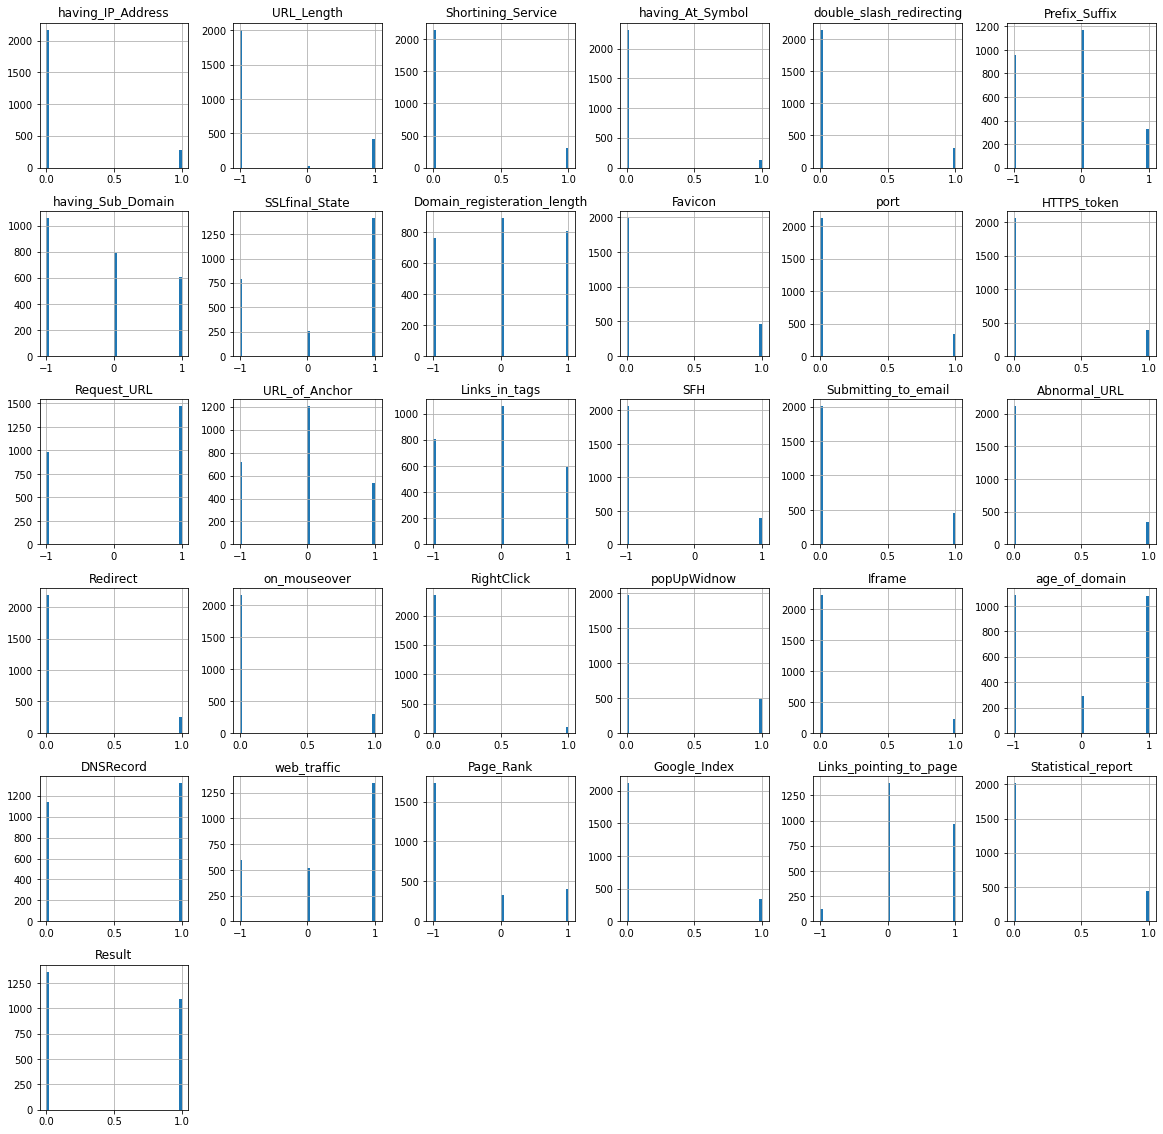

In [10]:
data.hist(bins = 50,figsize = (20,20))
plt.show()

**5. Seperating other feature with the target column (Result)**

In [11]:
y = data['Result']
X = data.drop('Result',axis=1)
X.shape, y.shape

((2456, 30), (2456,))

**6. 80-20 split for train and test data respectively**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((1964, 30), (492, 30))

**7. Classifying using Support Vector Machine (SVM) method**

In [24]:
from sklearn.svm import SVC

svmModel = SVC(kernel='linear', C=1.0, random_state=12)
svmModel.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

**8. Predicting using test data**

In [25]:
y_test_svm = svmModel.predict(X_test)
y_train_svm = svmModel.predict(X_train)

**9. Evaluating accuracy**

In [26]:
from sklearn.metrics import accuracy_score as getAcc

train_data_acc = getAcc(y_train,y_train_svm)
test_data_acc = getAcc(y_test,y_test_svm)

print("Accuracy :")
print("\tTraining data: {:.5f}%".format(train_data_acc*100))
print("\tTest data: {:.5f}%".format(test_data_acc*100))

Accuracy :
	Training data: 95.11202%
	Test data: 93.69919%


**ACCURACY**

*As we get the accuracy above 90 percent we can say it works quite well with the given data.*